In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from matplotlib.patches import Rectangle
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statistics import mean, median


In [5]:
# import survey data 

data = pd.read_csv('DataSim.csv')
data["Q3"] = data["Q3"].map(str.strip)

In [6]:
Q2_bin = pd.get_dummies(data["Q2"])
Q3_bin = pd.get_dummies(data["Q3"])
Q4_bin = pd.get_dummies(data["Q4"])
Q5_bin = pd.get_dummies(data["Q5"])


In [7]:
dems = pd.concat([Q2_bin, Q3_bin, Q4_bin, Q5_bin, data.loc[:,"Q6.1":"Q6.14"]], axis=1)

In [6]:
list(dems.columns.values)

['Private',
 'Public',
 'Director',
 'Engineer',
 'Manager',
 'President',
 'Principal',
 '1 to 5',
 '10 to 20',
 '20+',
 '5 to 10',
 'Midwest',
 'Northeast',
 'South',
 'West',
 'Q6.1',
 'Q6.2',
 'Q6.3',
 'Q6.4',
 'Q6.5',
 'Q6.6',
 'Q6.7',
 'Q6.8',
 'Q6.9',
 'Q6.10',
 'Q6.11',
 'Q6.12',
 'Q6.13',
 'Q6.14']

In [5]:
dems

,Private,Public,Director,Engineer,Manager,President,Principal,1 to 5,10 to 20,20+,...,Q6.5,Q6.6,Q6.7,Q6.8,Q6.9,Q6.10,Q6.11,Q6.12,Q6.13,Q6.14
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,1,1,1,1,1,1,1,0,0,1
3,0,1,1,0,0,0,0,0,1,0,...,1,1,1,1,0,0,0,1,1,1
4,1,0,0,0,0,1,0,0,1,0,...,1,1,1,0,0,0,1,0,0,0
5,1,0,1,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
6,0,1,0,0,1,0,0,0,1,0,...,1,1,0,0,1,1,0,0,0,0
7,1,0,0,1,0,0,0,0,0,0,...,1,1,1,0,0,1,1,0,0,0
8,1,0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,1,1,0,0,0
9,0,1,0,0,1,0,0,0,0,0,...,1,0,1,1,1,0,0,0,0,0


In [12]:
def draw_bs_pairs_log(x, y, size = 100):
    
    inds = np.arange(len(x))
    bs_slope_reps = []
    bs_intercept_reps = []
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        lr = LogisticRegression()
        lr.fit(bs_x, bs_y)
        bs_slope_reps.append(lr.coef_)
        bs_intercept_reps.append(lr.intercept_)
    
    return bs_slope_reps, bs_intercept_reps


# Effect of demographics on DA frequency of use 


In [438]:
x = dems.values.reshape(-1,29)
y = data["Q10"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([[-0.80440485, -0.63005955, -0.42157092,  0.27253197, -1.03643612,
         -0.22497657, -0.02401276, -0.2825971 , -0.88137581, -1.20152572,
          0.93103424, -0.89889382,  0.48215972,  0.06208549, -1.07981578,
         -0.66731908, -0.0963167 , -0.24613203, -0.24946765,  0.54257355,
         -0.31686552, -0.42547068,  0.19972723, -0.5990599 , -1.191625  ,
         -0.00158633, -0.27936423, -0.5798182 , -0.45878805],
        [-0.3076777 , -0.42171496,  0.86438221, -0.02887487,  0.51645804,
         -1.28101814, -0.80033992, -0.09871427, -0.28343698, -0.37681303,
          0.02957161,  0.16065702, -0.2718506 , -0.39731054, -0.22088855,
          0.05146811, -0.61126042, -0.34599337,  0.40056204, -0.67259996,
          0.11585636,  0.02082024,  0.93952119, -0.48287127,  0.58810891,
          0.60615789, -0.10366656, -0.37452047,  0.32954933],
        [-0.2733199 , -0.24511671, -0.23610311, -0.11573251, -0.19387713,
          0.0708999 , -0.04362376, -0.25640976,  0.04229571,  

In [439]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []

for i in range(100):
    for j in range(29):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
        list5.append(a[i][5,j])
        

In [440]:
array_0 = np.reshape(list0,(100,29))
array_1 = np.reshape(list1,(100,29))
array_2 = np.reshape(list2,(100,29))
array_3 = np.reshape(list3,(100,29))
array_4 = np.reshape(list4,(100,29))
array_5 = np.reshape(list5,(100,29))



array([[-0.80440485, -0.63005955, -0.42157092, ..., -0.27936423,
        -0.5798182 , -0.45878805],
       [-0.71298802, -0.36812531, -0.92396905, ..., -0.53385181,
        -1.08050127,  0.29149815],
       [-0.85530299, -0.9314955 , -0.30550545, ..., -0.40310316,
        -0.46161514, -0.38782435],
       ...,
       [-0.83304437, -0.41525198, -0.07286095, ..., -0.56577202,
        -0.15099476,  0.79378937],
       [-0.81861219, -0.73264639, -0.45566426, ..., -0.18253034,
        -0.55717366, -0.69142709],
       [-1.15184438, -0.66965402, -0.96937207, ..., -0.36799277,
        -0.93492372,  0.62799807]])

In [441]:
mean_list = []

for i in range(29):
   mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive_0", "Negative_0", "Mean_0"]
dfcoef
dfcoef.to_csv('LogRegTables/1a_dems_to_freq_DA_0.csv')    
      

In [444]:
sig_means = []
                    
for i in range(29):
    if dfcoef["Positive_0"].loc[i] < 0.05 or dfcoef["Positive_0"].loc[i] > 0.95:
        sig_means.append(((i, dfcoef["Positive_0"].loc[i], dfcoef["Mean_0"].loc[i])))
    
sig_means  

[(0, 0.0, -0.7714443273979193),
 (1, 0.01, -0.7176670897490155),
 (6, 0.0, -0.12336605245680612),
 (9, 0.0, -0.8369346331680072),
 (14, 0.03, -0.7467594165756695),
 (22, 0.97, 0.822379359937885),
 (24, 0.03, -0.8365489506615168),
 (26, 0.0, -0.3863438909345915)]

In [446]:
mean_list1 = []

for i in range(29):
   mean_list1.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef1 = pd.DataFrame(mean_list1)

dfcoef1.columns = ["Positive_1", "Negative_1", "Mean_1"]
dfcoef1
dfcoef1.to_csv('LogRegTables/1a_dems_to_freq_DA_1.csv')   

sig_means = []
                    
for i in range(29):
    if dfcoef1["Positive_1"].loc[i] < 0.05 or dfcoef1["Positive_1"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef1["Positive_1"].loc[i], dfcoef1["Mean_1"].loc[i])))
    
sig_means      

[(0, 0.0, -0.38450341989912984),
 (1, 0.02, -0.3922826668941152),
 (4, 0.99, 0.5219669056989704),
 (5, 0.0, -1.1341152376370542),
 (6, 0.0, -0.4348272747335843),
 (9, 0.02, -0.4736765613236583),
 (22, 0.98, 0.6195329788215553)]

In [447]:
mean_list2 = []

for i in range(29):
   mean_list2.append(((array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean()))
    
dfcoef2 = pd.DataFrame(mean_list2)

dfcoef2.columns = ["Positive_2", "Negative_2", "Mean_2"]
dfcoef2
dfcoef2.to_csv('LogRegTables/1a_dems_to_freq_DA_2.csv')     
    
sig_means = []
                    
for i in range(29):
    if dfcoef2["Positive_2"].loc[i] < 0.05 or dfcoef2["Positive_2"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef2["Positive_2"].loc[i], dfcoef2["Mean_2"].loc[i])))
    
sig_means      

[(0, 0.04, -0.2647633226544698),
 (1, 0.0, -0.3324776523787587),
 (11, 0.04, -0.3250229767746635)]

In [449]:
mean_list3 = []

for i in range(29):
   mean_list3.append(((array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean()))
    
dfcoef3 = pd.DataFrame(mean_list3)

dfcoef3.columns = ["Positive_3", "Negative_3", "Mean_3"]
dfcoef3
dfcoef3.to_csv('LogRegTables/1a_dems_to_freq_DA_3.csv')   
    
sig_means = []
                    
for i in range(29):
    if dfcoef3["Positive_3"].loc[i] < 0.05 or dfcoef3["Positive_3"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef3["Positive_3"].loc[i], dfcoef3["Mean_3"].loc[i])))

sig_means      

[(21, 0.97, 0.4871381761252334),
 (24, 0.96, 0.4261811724534175),
 (25, 0.0, -0.6011038979439568)]

In [450]:
mean_list4 = []

for i in range(29):
   mean_list4.append(((array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
    
dfcoef4 = pd.DataFrame(mean_list4)

dfcoef4.columns = ["Positive_4", "Negative_4", "Mean_4"]
dfcoef4.to_csv('LogRegTables/1a_dems_to_freq_DA_4.csv')  
    
sig_means = []
                    
for i in range(29):
    if dfcoef4["Positive_4"].loc[i] < 0.05 or dfcoef4["Positive_4"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef4["Positive_4"].loc[i], dfcoef4["Mean_4"].loc[i])))

sig_means   

[(8, 0.01, -0.5823867808987907),
 (22, 0.0, -0.6972783559375415),
 (28, 0.04, -0.5148401625318875)]

In [451]:
mean_list5 = []

for i in range(29):
   mean_list5.append(((array_5[:,i]>0).mean(), (array_5[:,i]<0).mean(), array_5[:,i].mean()))
    
dfcoef5 = pd.DataFrame(mean_list5)

dfcoef5.columns = ["Positive_5", "Negative_5", "Mean_5"]
dfcoef5.to_csv('LogRegTables/1a_dems_to_freq_DA_5.csv')  
    
sig_means = []
                    
for i in range(29):
    if dfcoef5["Positive_5"].loc[i] < 0.05 or dfcoef5["Positive_5"].loc[i] > 0.95:  
        sig_means.append(((i, dfcoef5["Positive_5"].loc[i], dfcoef5["Mean_5"].loc[i])))

sig_means  

[(0, 0.0, -0.683876711214265),
 (1, 0.0, -0.5909588308622122),
 (2, 0.0, -1.0016099306270838),
 (6, 0.0, -0.09738024046714887),
 (9, 0.01, -0.7992573244516197),
 (13, 0.01, -0.6585279656003551),
 (19, 0.97, 0.40159800325441464),
 (24, 0.03, -0.7265598133815331),
 (26, 0.0, -0.48899399570390173),
 (27, 0.0, -0.8264481835858649),
 (28, 0.03, -0.6475109484772755)]

In [ ]:
for i in range(29):
    mean_list.append((array_0[:,i]>0).mean())
      

In [335]:
# d = {'Mean': [], 'Min': [], 'Max': []}
# dfcoef = pd.DataFrame(data = d)

mean_list = []
for i in range(29):
    
    mean_list.append((max(array_0[:,i]), array_0[:,i].mean(), min(array_0[:,i])))
    
dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["max", "mean", "min"]

In [337]:
dfcoef
#dfcoef.to_csv('LogRegTables/1b_dems_to_uses_DA1.csv')

,max,mean,min
0,-0.327244,-0.793166,-1.403085
1,0.089738,-0.693824,-1.386990
2,0.391744,-0.427055,-1.167753
3,0.424312,-0.354625,-1.055774
4,0.148289,-0.624338,-1.466873
5,1.250429,0.029357,-0.870017
6,0.000000,-0.110328,-0.313741
7,0.307068,-0.392811,-1.172638
8,0.315015,-0.312568,-1.233944
9,-0.119321,-0.843321,-1.509538


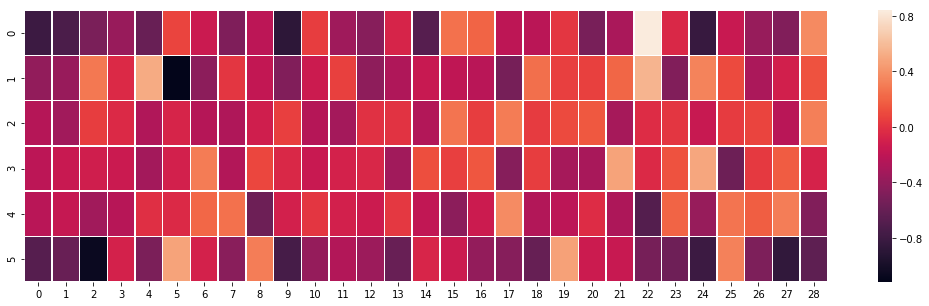

In [164]:
meancorr = np.array(a).mean(axis=0)
f,ax = plt.subplots(figsize=(18,5))
sns.heatmap(meancorr, linewidth = 0.5, ax = ax)


In [218]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (6):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
            acoef
        lcoef.append(acoef)  
        stats = [max(acoef), mean(acoef), min(acoef)]
        dfcoef.loc[i]= stats

dfcoef

,Max,Mean,Min
0,-0.009841,-0.759910,-1.590182
1,0.272585,-0.520435,-1.273641
2,-0.548240,-1.004451,-1.463955
3,0.879826,-0.129238,-0.943201
4,0.311285,-0.527586,-1.176469
5,1.508503,0.472341,-0.590571
6,0.000000,-0.091412,-0.308231
7,0.380218,-0.483124,-1.132261
8,1.086406,0.315684,-0.318327
9,-0.024434,-0.739365,-1.679750


# Effect of demographics on SIM frequency of use 


In [345]:
x = dems.values.reshape(-1,29)
y = data["Q16"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [347]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.073858,-0.432270,-0.930297
1,-0.242403,-0.695029,-1.272434
2,0.578087,-0.009149,-1.087007
3,0.470467,-0.235368,-0.826593
4,0.405575,-0.344462,-1.299282
5,0.745903,-0.245784,-1.199834
6,0.000000,-0.292535,-0.763498
7,0.731823,0.072468,-0.709825
8,0.352635,-0.200634,-1.105641
9,-0.020627,-0.599031,-1.348535


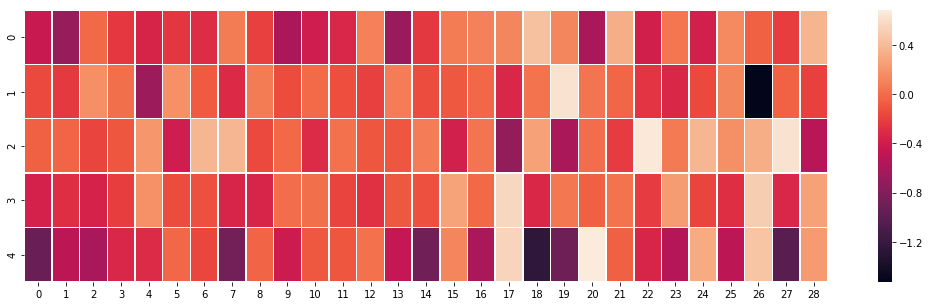

In [346]:
meancorr = np.array(a).mean(axis=0)
f,ax = plt.subplots(figsize=(18,5))
sns.heatmap(meancorr, linewidth = 0.5, ax = ax)

In [350]:
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        list2.append(a[i][1,j])
        list3.append(a[i][2,j])
        list4.append(a[i][3,j])
        list5.append(a[i][4,j])

array_1 = np.reshape(list1,(100,29))
array_2 = np.reshape(list2,(100,29))
array_3 = np.reshape(list3,(100,29))
array_4 = np.reshape(list4,(100,29))
array_5 = np.reshape(list5,(100,29))


In [353]:
mean_list1 = []

for i in range(29):
   mean_list1.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef1 = pd.DataFrame(mean_list1)

dfcoef1.columns = ["Positive_1", "Negative_1", "Mean_1"]
dfcoef1
dfcoef1.to_csv('LogRegTables/1a_dems_to_freq_SIM_1.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef1["Positive_1"].loc[i] < 0.05: 
        sig_means.append(((i, dfcoef1["Positive_1"].loc[i], dfcoef1["Mean_1"].loc[i])))
    
sig_means      

[(0, 0.01, -0.43226954170835746),
 (1, 0.0, -0.6950286476898584),
 (6, 0.0, -0.2925353911638545),
 (9, 0.0, -0.5990310788316531),
 (13, 0.01, -0.6720059863755041),
 (20, 0.04, -0.589772554843427)]

In [354]:
mean_list2 = []

for i in range(29):
   mean_list2.append(((array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean()))
    
dfcoef2 = pd.DataFrame(mean_list2)

dfcoef2.columns = ["Positive_2", "Negative_2", "Mean_2"]
dfcoef2.to_csv('LogRegTables/1a_dems_to_freq_SIM_2.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef2["Positive_2"].loc[i] < 0.05: 
        sig_means.append(((i, dfcoef2["Positive_2"].loc[i], dfcoef2["Mean_2"].loc[i])))
    
sig_means 

[(4, 0.0, -0.6679203897390691), (26, 0.0, -1.524553988957974)]

In [362]:
mean_list3 = []

for i in range(29):
   mean_list3.append(((array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean()))
    
dfcoef3 = pd.DataFrame(mean_list3)

dfcoef3.columns = ["Positive_3", "Negative_3", "Mean_3"]
dfcoef3.to_csv('LogRegTables/1a_dems_to_freq_SIM_3.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef3["Positive_3"].loc[i] < 0.05 or dfcoef3["Positive_3"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef3["Positive_3"].loc[i], dfcoef3["Mean_3"].loc[i])))
    
sig_means 

[(15, 0.04, -0.3743838547687254),
 (17, 0.0, -0.7062161590362092),
 (19, 0.01, -0.5902667518357625),
 (22, 0.99, 0.6616674109177744),
 (27, 1.0, 0.6309770554968882),
 (28, 0.02, -0.5224106401592546)]

In [363]:
mean_list4 = []

for i in range(29):
   mean_list4.append(((array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
    
dfcoef4 = pd.DataFrame(mean_list4)

dfcoef4.columns = ["Positive_4", "Negative_4", "Mean_4"]
dfcoef4.to_csv('LogRegTables/1a_dems_to_freq_SIM_4.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef4["Positive_4"].loc[i] < 0.05 or dfcoef4["Positive_4"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef4["Positive_4"].loc[i], dfcoef4["Mean_4"].loc[i])))
    
sig_means 

[(0, 0.03, -0.36458244126574213),
 (1, 0.04, -0.2852047107057155),
 (17, 0.98, 0.5696324681821866)]

In [364]:
mean_list5 = []

for i in range(29):
   mean_list5.append(((array_5[:,i]>0).mean(), (array_5[:,i]<0).mean(), array_5[:,i].mean()))
    
dfcoef5 = pd.DataFrame(mean_list5)

dfcoef5.columns = ["Positive_5", "Negative_5", "Mean_5"]
dfcoef5.to_csv('LogRegTables/1a_dems_to_freq_SIM_5.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef5["Positive_5"].loc[i] < 0.05 or dfcoef5["Positive_5"].loc[i] > 0.95: 
        sig_means.append(((i, dfcoef5["Positive_5"].loc[i], dfcoef5["Mean_5"].loc[i])))
    
sig_means 

[(0, 0.0, -0.923650133474134),
 (1, 0.02, -0.49071576850179743),
 (6, 0.0, -0.16143823311172004),
 (7, 0.0, -0.8742674977755377),
 (14, 0.0, -0.8877206262789286),
 (16, 0.02, -0.5908214602790168),
 (17, 0.99, 0.5511495015284087),
 (18, 0.0, -1.2553074464227088),
 (19, 0.01, -0.9099676321403304),
 (20, 0.99, 0.6844521571405157),
 (23, 0.04, -0.5415542289059112),
 (27, 0.0, -1.0210581442180133)]

# Effect of demographics on DA use 

In [10]:
DAuse = data.loc[:,"Q9.1":"Q9.5"]

In [385]:
x = dems.values.reshape(-1,29)
y = data["Q9.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

[i.shape for i in a]


/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([[ 0.25330572,  0.34129468,  0.31810835, -0.60336882,  0.50386927,
         -0.91320186,  1.28919346,  0.13167245,  0.23907501, -0.01236491,
          0.23621785,  0.28960178,  0.36447646, -0.16772949,  0.10825164,
         -0.40051331, -0.67232584,  0.62440106,  0.3583214 ,  0.4596435 ,
         -0.61514396, -0.0542086 ,  0.01753047,  0.13211308, -0.20987429,
         -0.66086416, -0.12559013, -0.5193076 ,  0.35425694]]),
 array([[-0.12138721,  0.04763426, -0.01725565, -0.12992073,  0.07936839,
         -1.17866896,  1.17272399, -0.56378318,  0.32122819,  0.1431176 ,
          0.02568443, -0.06234308, -0.13934913,  0.19827398, -0.07033473,
         -0.05769809, -0.31259606,  0.20669492,  0.19083221,  0.8741549 ,
          0.12463614,  0.09572242,  0.58502207,  0.07601214,  0.1537865 ,
          0.19672793,  0.38472517, -0.1528252 ,  0.04091426]]),
 array([[ 0.13244233,  0.15386195,  0.41006439, -0.08329939,  0.44096768,
         -0.97261265,  0.49118424, -0.23773569,  0.3497908

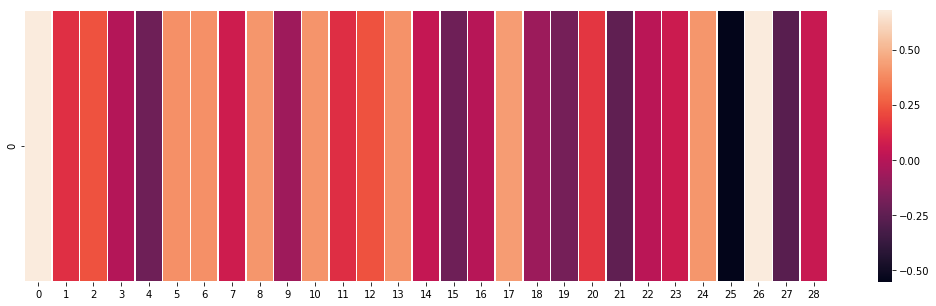

In [115]:
meancoef = np.array(a).mean(axis=0)
f,ax = plt.subplots(figsize=(18,5))
sns.heatmap(meancoef, linewidth = 0.5, ax = ax)

In [113]:
meancoef = np.array(a[0][0][0])
meancoef

array(0.58710945)

In [388]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))


array([[ 0.25330572,  0.34129468,  0.31810835, ..., -0.12559013,
        -0.5193076 ,  0.35425694],
       [-0.12138721,  0.04763426, -0.01725565, ...,  0.38472517,
        -0.1528252 ,  0.04091426],
       [ 0.13244233,  0.15386195,  0.41006439, ...,  0.44937557,
        -0.70370362, -0.151682  ],
       ...,
       [-0.24081132,  0.17049148,  0.50697397, ...,  0.39672832,
        -0.30762928,  0.29502037],
       [ 0.14742965,  0.20235012,  0.48791104, ..., -0.22662152,
        -0.38521132,  0.03654873],
       [-0.02917016,  0.35271132,  0.18297769, ...,  1.08877447,
        -0.43644446, -0.21700759]])

In [390]:
mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1a_dems_to_use_DA_.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means     

[(1, 0.95, 0.21647566777386534),
 (5, 0.0, -0.6958983993355293),
 (6, 1.0, 0.6968479349280523),
 (19, 0.99, 0.5231969678654018)]

In [270]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_uses_DA_0.csv')

In [391]:
x = dems.values.reshape(-1,29)
y = data["Q9.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)


/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([[ 0.81932464, -0.05115764,  0.3979497 , -0.29320101, -0.36566215,
          0.66855575,  0.3605247 ,  0.33318911,  0.23963275, -0.13970817,
          0.3350533 , -0.03994203,  0.66967587, -0.18446352,  0.32289667,
         -0.29372617,  0.28883567,  0.10733848, -0.61633046,  0.07279743,
          0.19530451, -0.04697618, -0.03060042,  0.17895558,  0.68557172,
         -0.36816366,  0.21175134,  0.31912268, -0.20087486]]),
 array([[ 0.79391436,  0.54296313,  0.22815117,  0.22129275, -0.397806  ,
          0.97699558,  0.30824399,  0.15677426,  0.69251562, -0.2006723 ,
          0.6882599 ,  0.7901076 , -0.04466949,  0.48458394,  0.10685544,
         -0.37232707, -0.20235365, -0.04141987, -0.22003186, -0.5692008 ,
          0.22835272, -0.30033215,  0.28283605,  0.34795149, -0.1144466 ,
         -1.05547633,  0.36109708, -0.48800537,  0.02152366]]),
 array([[ 1.01596777, -0.20645016,  0.02329694,  0.47194597, -0.35102756,
         -0.04186003,  0.70716228, -0.30436296,  0.2990444

In [392]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))


array([[ 0.81932464, -0.05115764,  0.3979497 , ...,  0.21175134,
         0.31912268, -0.20087486],
       [ 0.79391436,  0.54296313,  0.22815117, ...,  0.36109708,
        -0.48800537,  0.02152366],
       [ 1.01596777, -0.20645016,  0.02329694, ...,  0.57801993,
        -0.07986033,  0.04261736],
       ...,
       [ 0.9536583 , -0.04458768, -0.0157955 , ..., -0.05660855,
        -0.14891732,  0.051152  ],
       [ 0.64775696,  0.30693194, -0.39164667, ...,  0.23104723,
         0.18614693, -0.22529704],
       [ 0.6591115 ,  0.19498151,  0.46537698, ...,  0.56917826,
        -0.14803323, -0.44086262]])

In [393]:
mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1a_dems_to_use_DA_2.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means     

[(0, 1.0, 0.7128585559279194),
 (6, 1.0, 0.4185148767650881),
 (8, 0.98, 0.45423156004363024),
 (10, 0.96, 0.4324003593663489),
 (25, 0.01, -0.5995913606830612),
 (26, 0.95, 0.5807640907091633)]

In [395]:
x = dems.values.reshape(-1,29)
y = data["Q9.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [397]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1a_dems_to_use_DA_3.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means 

[(1, 0.96, 0.30505144303719994),
 (6, 0.97, 0.6678867320100095),
 (10, 0.98, 0.3823533214096825),
 (22, 0.01, -0.47689402476422527),
 (26, 0.99, 0.9536072248383376),
 (28, 0.0, -0.6366479335521569)]

In [264]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_uses_DA_2.csv')

In [398]:
x = dems.values.reshape(-1,29)
y = data["Q9.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [399]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1a_dems_to_use_DA_4.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means 

[(5, 0.04, -0.6980869832319665), (10, 0.04, -0.36416634201117537)]

In [266]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_uses_DA_3.csv')

In [400]:
x = dems.values.reshape(-1,29)
y = data["Q9.5"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [401]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1a_dems_to_use_DA_5.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means 

[(0, 0.01, -0.2913422996377926),
 (1, 0.02, -0.377432335297538),
 (4, 0.0, -0.5948937760741506),
 (8, 0.03, -0.3910246736218888),
 (19, 0.98, 0.5378350247563004),
 (27, 0.96, 0.5520825373840652)]

In [268]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_uses_DA_4.csv')

# Effect on DA use on DA steps (design process)


In [481]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)


/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([[-0.26870874, -0.40361886, -0.2829026 , -0.67029041, -0.80547105],
        [ 0.07176916,  0.0515155 , -0.69787173, -0.50389445,  0.46846939],
        [-0.27857031, -0.56667759,  0.42172655,  0.3646845 , -0.49007617],
        [ 0.20338415, -0.21928924, -0.2208166 , -0.48875467,  0.15697127],
        [-0.16356614,  0.26219124,  0.27444666,  0.51449299, -0.07696576]]),
 array([[ 2.57200502e-04, -1.41488472e-02, -5.11868282e-01,
         -5.58908503e-02,  3.19309469e-01],
        [ 1.45567616e-01,  3.72762489e-02, -2.49094699e-02,
         -2.41255647e-01, -2.37379604e-01],
        [-2.71716852e-01, -1.63769253e-01,  1.40685795e-01,
          2.92308625e-01, -6.55842863e-02],
        [ 3.02572835e-01,  8.31552225e-02, -8.68792588e-03,
         -1.97658799e-01,  1.54124589e-01],
        [-3.84564071e-01, -3.84310203e-01, -6.66106059e-02,
          5.98149131e-02, -1.53235701e-01]]),
 array([[-9.71680908e-02,  3.07647268e-02, -3.24483134e-01,
          2.24581848e-02, -4.81540480e-01

In [482]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))



array([[-2.68708738e-01, -4.03618857e-01, -2.82902600e-01,
        -6.70290412e-01, -8.05471046e-01],
       [ 2.57200502e-04, -1.41488472e-02, -5.11868282e-01,
        -5.58908503e-02,  3.19309469e-01],
       [-9.71680908e-02,  3.07647268e-02, -3.24483134e-01,
         2.24581848e-02, -4.81540480e-01],
       [ 3.63950910e-02, -4.56163485e-01,  2.17726778e-01,
         1.73388635e-01,  1.27255396e-02],
       [ 3.19479233e-01, -5.41828128e-02, -2.74907056e-01,
         2.65935458e-01,  1.98704207e-01],
       [-6.40675422e-01,  1.29379501e-01, -4.95016710e-01,
        -3.11732619e-01, -9.14449243e-01],
       [-4.13541844e-01,  7.56787723e-02, -9.45062530e-01,
        -6.02557123e-01, -1.39270817e-01],
       [-3.01057107e-01, -4.34541952e-01,  1.63491781e-01,
        -4.26632303e-01,  1.78198306e-01],
       [ 1.99337289e-01, -1.25344870e-01, -6.90447864e-01,
        -6.34351477e-01, -1.10376566e-01],
       [-2.15187156e-01,  1.94264384e-01, -1.10523154e+00,
        -2.14044381e-01

In [492]:
mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_1.csv')    



In [222]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.704272,-0.015925,-0.908537
1,0.409269,-0.074347,-1.018198
2,0.490510,-0.430218,-1.413766
3,0.451992,-0.398840,-1.205164
4,0.691690,-0.208381,-1.063132


In [493]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [494]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_2.csv')    


In [495]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [496]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_3.csv')  

In [497]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [498]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_4.csv')  

In [499]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.5"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [500]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_5.csv') 

In [501]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.6"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [502]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_6.csv') 

In [503]:
x = DAuse.values.reshape(-1,5)
y = data["Q11.7"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [504]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAuse_to_process_7.csv')

# Effect of DA use on DA issue

In [418]:
x = DAuse.values.reshape(-1,5)
y = data["Q12.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [420]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))


array([[ 5.54571212e-01,  2.09761736e-01, -1.85445093e-01,
        -1.94811169e-01, -5.39764563e-01],
       [ 1.36939418e-01,  1.57654562e-02,  4.80279237e-02,
         3.30889571e-02, -1.78465510e-01],
       [-1.03882574e-01,  2.77425524e-01, -3.58785515e-01,
         2.66122883e-01, -4.93899336e-02],
       [ 2.45620997e-01,  4.81545323e-01, -3.81561379e-02,
         3.47077298e-01, -5.65801703e-02],
       [-2.01123328e-01,  4.64390676e-01,  2.73787700e-01,
         3.99035285e-01,  1.12979281e-01],
       [-1.32903810e-01,  7.46049437e-01, -1.04581514e-01,
         2.28975487e-01, -2.38382969e-01],
       [ 1.53679907e-01,  4.35719928e-01,  1.82922428e-01,
        -3.34888793e-01, -4.35243435e-02],
       [ 1.82451344e-01,  7.98503666e-01, -7.13885207e-02,
        -1.15367941e-01,  1.21617181e-01],
       [-2.22446625e-01,  2.05539598e-01,  7.19071024e-02,
         2.36392669e-01, -1.13288387e-01],
       [-6.31244308e-02,  6.82460653e-01, -2.51422749e-01,
        -8.82483606e-02

In [183]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.528819,0.068029,-0.394266
1,1.285524,0.471848,-0.128575
2,0.412000,-0.075660,-0.534329
3,0.544676,0.049598,-0.465334
4,0.429927,-0.111682,-0.652731


In [421]:
mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_DAuse_to_issue1.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(1, 0.99, 0.5116233496449533)]

In [422]:
x = DAuse.values.reshape(-1,5)
y = data["Q12.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [423]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_DAuse_to_issue2.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(1, 0.96, 0.46196176390657073)]

In [204]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.068966,-0.447117,-0.831790
1,0.275248,-0.084783,-0.507739
2,0.297265,-0.280172,-0.958430
3,0.457984,-0.173561,-0.718056
4,0.467661,0.003139,-0.580401


In [424]:
x = DAuse.values.reshape(-1,5)
y = data["Q12.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [426]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_DAuse_to_issue3.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(0, 0.95, 0.3243523327959135)]

In [185]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.528819,0.068029,-0.394266
1,1.285524,0.471848,-0.128575
2,0.412000,-0.075660,-0.534329
3,0.544676,0.049598,-0.465334
4,0.429927,-0.111682,-0.652731


In [427]:
x = DAuse.values.reshape(-1,5)
y = data["Q12.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [428]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_DAuse_to_issue4.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[]

In [186]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.528819,0.068029,-0.394266
1,1.285524,0.471848,-0.128575
2,0.412000,-0.075660,-0.534329
3,0.544676,0.049598,-0.465334
4,0.429927,-0.111682,-0.652731


# Effect of DA issue on DA improvement 

In [8]:
DAissue = data.loc[:,"Q12.1":"Q12.4"]

In [32]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([[ 0.1722817 , -0.08136579,  0.63709829, -0.31924291],
        [ 0.07404556,  0.64660097, -0.28763248,  0.13467334],
        [-0.36946225, -0.86074176, -0.53866526,  0.25300367],
        [-0.63010548, -0.54523825, -0.77933922, -0.55433589]]),
 array([[ 0.3123629 , -0.41195579,  0.07910285, -0.2214022 ],
        [-0.10299666,  0.80174457, -0.26396568,  0.05425106],
        [-0.38888036, -0.62246983,  0.14994487,  0.17185288],
        [-1.13022869, -0.88991567, -0.80726977, -0.07676558]]),
 array([[-0.11549339, -0.26101017,  0.25639964, -0.08060386],
        [ 0.19203454,  0.38539074, -0.26258094,  0.07675494],
        [-0.09138798, -0.11395913, -0.14078276, -0.12656663],
        [-0.99545477, -0.89529879, -0.34030226,  0.08767613]]),
 array([[ 0.28789012, -0.42790223,  0.1287888 , -0.02331466],
        [-0.00690445,  0.58071831, -0.31373073,  0.18991339],
        [-0.31039436, -0.39270348,  0.05161044, -0.22341397],
        [-1.46228695,  0.24228813, -0.13255167, -0.65876208]]),


In [33]:
list0 = []
list1 = []
list2 = []
list3 = []

for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
    
      

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))


mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_1.csv')

IndexError: index 3 is out of bounds for axis 0 with size 3

In [25]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_2.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_3.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([[-0.19578612, -0.06230947,  0.11622458, -0.3135676 ],
        [ 0.30052213, -0.07082403, -0.04311467, -0.03841666],
        [-0.02250296,  0.17313544, -0.21079164,  0.43194525],
        [-1.00293935, -0.34835042,  0.11230543, -0.77001318]]),
 array([[-0.15959425, -0.41734537, -0.07471677, -0.09312283],
        [ 0.16645716,  0.07495489,  0.20054599,  0.24745232],
        [-0.31681328,  0.30017256, -0.30881015,  0.02922805],
        [ 0.3180642 , -0.56230025, -0.12873403, -1.15780416]]),
 array([[-0.65818448, -0.42926449, -0.15353499, -0.31369591],
        [ 0.05547804,  0.1598339 , -0.12681641, -0.0506498 ],
        [ 0.18569565, -0.02755688,  0.21651361,  0.12435242],
        [-0.06068491, -0.06469994, -0.47025891,  0.02067368]]),
 array([[-0.14553624, -0.08686575, -0.33196823,  0.14525832],
        [-0.00284254,  0.27335201,  0.30516889,  0.03168498],
        [ 0.14705746, -0.16307595, -0.26262597,  0.11493251],
        [-0.49755564, -0.66093116, -0.09983435, -1.25988753]]),


In [36]:
list0 = []
list1 = []
list2 = []
list3 = []



for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_4.csv')

In [38]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.5"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_5.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.6"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_6.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.7"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_7.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.8"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []



for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2"]
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_8.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.9"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_9.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
x = DAissue.values.reshape(-1,4)
y = data["Q13.10"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_DAissue_to_improve_10.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Effect of SIM demographics on SIM use

In [402]:
x = dems.values.reshape(-1,29)
y = data["Q15.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [403]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_use_SIM_1.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means 

[(4, 0.01, -0.6172567239894718),
 (6, 1.0, 0.9811618270218626),
 (11, 0.03, -0.2935990589716425),
 (26, 0.95, 0.5134772374337794)]

In [190]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats


,Max,Mean,Min
0,0.363593,-0.073621,-0.493684
1,0.248878,-0.155260,-0.594160
2,0.320406,-0.151715,-0.737255
3,0.381827,-0.192956,-0.659540
4,-0.021271,-0.575746,-1.080395
5,0.682148,-0.249522,-0.949281
6,1.765920,0.941058,0.000000
7,0.855423,0.242600,-0.367992
8,0.498606,0.084421,-0.328606
9,0.477940,-0.244151,-0.744003


In [404]:
x = dems.values.reshape(-1,29)
y = data["Q15.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [405]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_use_SIM_2.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means 

[(19, 0.01, -0.4984274700410291), (24, 0.01, -0.39589803786074873)]

In [192]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats


,Max,Mean,Min
0,0.188281,-0.088744,-0.492689
1,0.290263,-0.155066,-0.619833
2,0.455913,-0.192532,-1.068833
3,0.628029,0.187545,-0.273355
4,0.575961,0.071684,-0.475233
5,0.855250,0.079267,-0.842515
6,0.617562,-0.389774,-1.194073
7,0.489172,-0.229137,-1.217235
8,0.542321,0.032236,-0.512283
9,0.394520,-0.059665,-0.453931


In [412]:
x = dems.values.reshape(-1,29)
y = data["Q15.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [413]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_use_SIM_3.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(0, 1.0, 0.5446457769138586),
 (1, 0.99, 0.4418876434549701),
 (2, 0.95, 0.5426098944152122),
 (6, 0.98, 0.21634103319746537),
 (8, 0.99, 0.5575561358655983),
 (11, 0.99, 0.5376431635053981),
 (13, 0.95, 0.4904833772550077),
 (21, 0.99, 0.7044723499665599)]

In [194]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats


,Max,Mean,Min
0,1.195231,0.515864,0.008553
1,1.073610,0.456793,0.050486
2,1.219831,0.535299,-0.359465
3,0.816207,0.162053,-0.532418
4,0.854390,0.148384,-0.609702
5,1.222594,-0.100162,-1.197184
6,0.482974,0.227083,0.000000
7,0.804179,0.005811,-0.812965
8,1.158862,0.498140,-0.108263
9,1.035867,0.381162,-0.296557


In [414]:
x = dems.values.reshape(-1,29)
y = data["Q15.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [415]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_use_SIM_4.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(1, 0.03, -0.3597376018149947),
 (3, 0.02, -0.5219143517546168),
 (7, 0.95, 0.4570004438146703),
 (8, 0.0, -0.5570944926611486),
 (12, 0.01, -0.5211366071961904),
 (24, 0.01, -0.5165183767306426),
 (28, 0.97, 0.4246049234714714)]

In [196]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats


,Max,Mean,Min
0,0.497569,0.103617,-0.223354
1,0.117809,-0.385463,-0.778202
2,0.323932,-0.332911,-0.896643
3,-0.034776,-0.544241,-1.318170
4,0.217909,-0.250002,-0.715887
5,0.839041,0.180036,-0.667634
6,1.494042,0.665273,-0.316453
7,1.018280,0.438235,-0.277218
8,-0.157743,-0.587503,-1.137523
9,0.500618,-0.033373,-0.558154


In [416]:
x = dems.values.reshape(-1,29)
y = data["Q15.5"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [417]:
list1 = []

for i in range(100):
    for j in range(29):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,29))
array_1

mean_list = []

for i in range(29):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/1b_dems_to_use_SIM_5.csv')    

sig_means = []
                    
for i in range(29):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(0, 0.01, -0.4283585685406895),
 (8, 0.0, -0.4420241171452255),
 (14, 0.0, -0.41298750530062234),
 (16, 0.97, 0.4010547820545659)]

In [198]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (29): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats


,Max,Mean,Min
0,0.068966,-0.447117,-0.831790
1,0.275248,-0.084783,-0.507739
2,0.297265,-0.280172,-0.958430
3,0.457984,-0.173561,-0.718056
4,0.467661,0.003139,-0.580401
5,0.805921,0.050627,-0.749330
6,1.054129,-0.131933,-0.946891
7,0.991024,0.240162,-0.619902
8,0.063734,-0.448264,-1.092837
9,0.325821,-0.263981,-0.792162


# Effect of SIM use on SIM steps 

In [48]:
SIMuse = data.loc[:,"Q15.1":"Q15.5"]

In [505]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [506]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_1.csv')  

In [507]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [508]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_2.csv') 

In [509]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [510]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_3.csv') 

In [511]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [512]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_4.csv')

In [513]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.5"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [514]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_5.csv')

In [515]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.6"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [516]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_6.csv')

In [517]:
x = SIMuse.values.reshape(-1,5)
y = data["Q17.7"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [518]:
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(5):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])
      

array_0 = np.reshape(list0,(100,5))        
array_1 = np.reshape(list1,(100,5))
array_2 = np.reshape(list2,(100,5))
array_3 = np.reshape(list3,(100,5))
array_4 = np.reshape(list4,(100,5))


mean_list = []

for i in range(5):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(),
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))
                          

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3",
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMuse_to_process_7.csv')

# Effect of SIM use on SIM issues

In [430]:
x = SIMuse.values.reshape(-1,5)
y = data["Q18.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [431]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_SIMuse_to_issue1.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(0, 0.95, 0.32229487655759553)]

In [199]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.068966,-0.447117,-0.831790
1,0.275248,-0.084783,-0.507739
2,0.297265,-0.280172,-0.958430
3,0.457984,-0.173561,-0.718056
4,0.467661,0.003139,-0.580401


In [432]:
x = SIMuse.values.reshape(-1,5)
y = data["Q18.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [433]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_SIMuse_to_issue2.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[]

In [200]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.068966,-0.447117,-0.831790
1,0.275248,-0.084783,-0.507739
2,0.297265,-0.280172,-0.958430
3,0.457984,-0.173561,-0.718056
4,0.467661,0.003139,-0.580401


In [434]:
x = SIMuse.values.reshape(-1,5)
y = data["Q18.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [435]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_SIMuse_to_issue3.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[]

In [201]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.068966,-0.447117,-0.831790
1,0.275248,-0.084783,-0.507739
2,0.297265,-0.280172,-0.958430
3,0.457984,-0.173561,-0.718056
4,0.467661,0.003139,-0.580401


In [436]:
x = SIMuse.values.reshape(-1,5)
y = data["Q18.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [437]:
list1 = []

for i in range(100):
    for j in range(5):
        list1.append(a[i][0,j])
        
array_1 = np.reshape(list1,(100,5))

mean_list = []

for i in range(5):
   mean_list.append(((array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean()))
    
dfcoef = pd.DataFrame(mean_list)

dfcoef.columns = ["Positive", "Negative", "Mean"]
dfcoef
dfcoef.to_csv('LogRegTables/3a_SIMuse_to_issue4.csv')    

sig_means = []
                    
for i in range(5):
    if dfcoef["Positive"].loc[i] <= 0.05 or dfcoef["Positive"].loc[i] >= 0.95:
        sig_means.append(((i, dfcoef["Positive"].loc[i], dfcoef["Mean"].loc[i])))
    
sig_means

[(0, 0.01, -0.433962660816851), (3, 0.99, 0.4039943169192739)]

In [202]:
lcoef = []
d = {'Mean': [], 'Min': [], 'Max': []}
dfcoef = pd.DataFrame(data = d)

for i in range (5): 
    for j in range (1):
        acoef = []
        for k in range (100): 
            acoef.append(a[k][j,i])
        lcoef.append(acoef)  
    
    stats = [max(lcoef[i]), mean(lcoef[i]), min(lcoef[i])]
    dfcoef.loc[i] = stats
dfcoef

,Max,Mean,Min
0,0.068966,-0.447117,-0.831790
1,0.275248,-0.084783,-0.507739
2,0.297265,-0.280172,-0.958430
3,0.457984,-0.173561,-0.718056
4,0.467661,0.003139,-0.580401


# SIM issue to improvement 

In [52]:
SIMissue = data.loc[:,"Q18.1":"Q18.4"]

In [53]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.1"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_1.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.2"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_2.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.3"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_3.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.4"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean())) 

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3"] 
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_4.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.5"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_5.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.6"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_6.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.7"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_7.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.8"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_8.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.9"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_9.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
x = SIMissue.values.reshape(-1,4)
y = data["Q19.10"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

list0 = []
list1 = []
list2 = []
list3 = []
list4 = []


for i in range(100):
    for j in range(4):
        list0.append(a[i][0,j])
        list1.append(a[i][1,j])
        list2.append(a[i][2,j])
        list3.append(a[i][3,j])
        list4.append(a[i][4,j])

array_0 = np.reshape(list0,(100,4))        
array_1 = np.reshape(list1,(100,4))
array_2 = np.reshape(list2,(100,4))
array_3 = np.reshape(list3,(100,4))
array_4 = np.reshape(list4,(100,4))

mean_list = []

for i in range(4):
    mean_list.append(((array_0[:,i]>0).mean(), (array_0[:,i]<0).mean(), array_0[:,i].mean(), 
                        (array_1[:,i]>0).mean(), (array_1[:,i]<0).mean(), array_1[:,i].mean(),
                         (array_2[:,i]>0).mean(), (array_2[:,i]<0).mean(), array_2[:,i].mean(),
                          (array_3[:,i]>0).mean(), (array_3[:,i]<0).mean(), array_3[:,i].mean(), 
                           (array_4[:,i]>0).mean(), (array_4[:,i]<0).mean(), array_4[:,i].mean()))

mean_list

dfcoef = pd.DataFrame(mean_list)
dfcoef.columns = ["Postive_0", "Negative_0", "Mean_0",
                  "Postive_1", "Negative_1", "Mean_1",
                  "Postive_2", "Negative_2", "Mean_2",
                  "Postive_3", "Negative_3", "Mean_3", 
                  "Postive_4", "Negative_4", "Mean_4"]
dfcoef

dfcoef.to_csv('LogRegTables/2_SIMissue_to_improve_10.csv')

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
